# Importing the libraries and loading the dataset.

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from prettytable import PrettyTable
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Data preprocessing.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


## [1] Convolutional Neural Network with 2x2 kernel and 2 covolutional layers followed by maxpooling and dense layers.

In [0]:
batch_size = 128
epochs = 32

#### With dropout rate = 0.5

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [9]:
model.summary()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

Test score: 0.030957782491080433
Test accuracy: 0.9906


Text(0, 0.5, 'Categorical Crossentropy Loss')

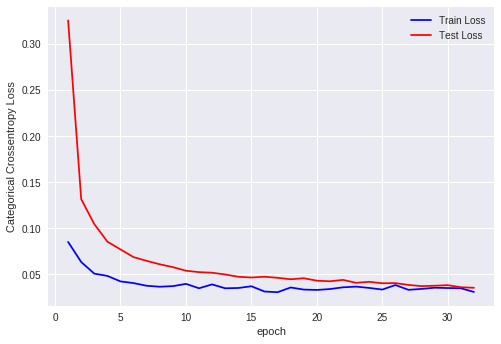

In [10]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
import numpy as np
import time
plt.plot(list(range(1,epochs+1)), history.history['val_loss'], 'b', label="Train Loss")
plt.plot(list(range(1,epochs+1)), history.history['loss'], 'r', label="Test Loss")
plt.legend()
plt.xlabel('epoch') ; plt.ylabel('Categorical Crossentropy Loss')

#### With dropout rate = 0.3



In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [13]:
model.summary()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

Test score: 0.042580653054968436
Test accuracy: 0.9901


Text(0, 0.5, 'Categorical Crossentropy Loss')

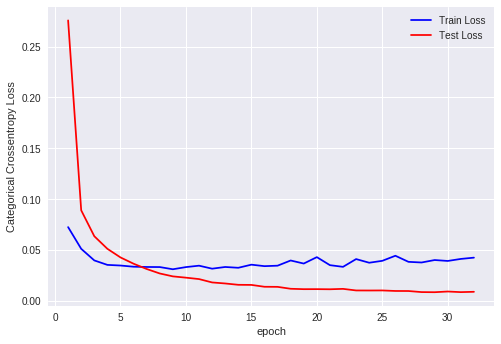

In [14]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
import numpy as np
import time
plt.plot(list(range(1,epochs+1)), history.history['val_loss'], 'b', label="Train Loss")
plt.plot(list(range(1,epochs+1)), history.history['loss'], 'r', label="Test Loss")
plt.legend()
plt.xlabel('epoch') ; plt.ylabel('Categorical Crossentropy Loss')



#### With dropout rate = 0.1


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [17]:
model.summary()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

Test score: 0.050449168614755305
Test accuracy: 0.9899


Text(0, 0.5, 'Categorical Crossentropy Loss')

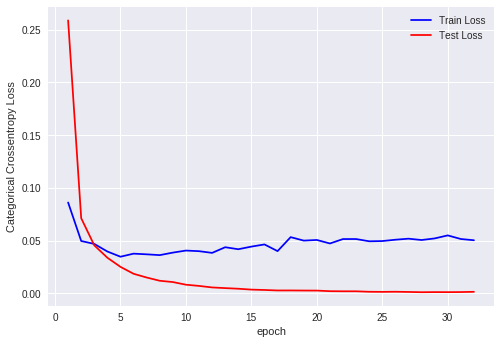

In [18]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
import numpy as np
import time
plt.plot(list(range(1,epochs+1)), history.history['val_loss'], 'b', label="Train Loss")
plt.plot(list(range(1,epochs+1)), history.history['loss'], 'r', label="Test Loss")
plt.legend()
plt.xlabel('epoch') ; plt.ylabel('Categorical Crossentropy Loss')

## [2] Convolutional Neural Network with 5x5 kernel and 3 covolutional layers followed by maxpooling after 1st  layer and 3rd layer and at last dense layers.

In [0]:
batch_size = 512
epochs = 24

#### With dropout rate = 0.5

In [0]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [22]:
model.summary()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 32)          12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
__________

Test score: 0.0359237082822503
Test accuracy: 0.9904


Text(0, 0.5, 'Categorical Crossentropy Loss')

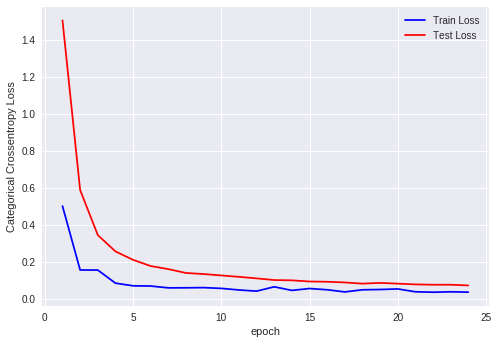

In [23]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
import numpy as np
import time
plt.plot(list(range(1,epochs+1)), history.history['val_loss'], 'b', label="Train Loss")
plt.plot(list(range(1,epochs+1)), history.history['loss'], 'r', label="Test Loss")
plt.legend()
plt.xlabel('epoch') ; plt.ylabel('Categorical Crossentropy Loss')

#### With dropout rate = 0.3

In [0]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [27]:
model.summary()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 16)          3216      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 32)          12832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
__________

Test score: 0.040330715390820476
Test accuracy: 0.9893


Text(0, 0.5, 'Categorical Crossentropy Loss')

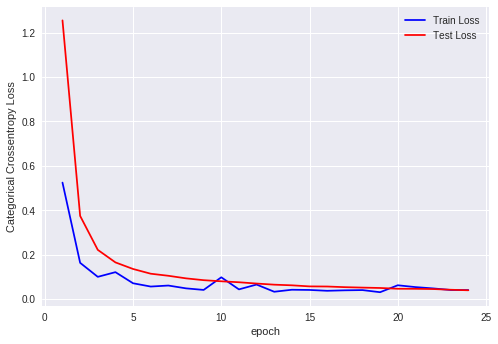

In [28]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
import numpy as np
import time
plt.plot(list(range(1,epochs+1)), history.history['val_loss'], 'b', label="Train Loss")
plt.plot(list(range(1,epochs+1)), history.history['loss'], 'r', label="Test Loss")
plt.legend()
plt.xlabel('epoch') ; plt.ylabel('Categorical Crossentropy Loss')

#### With dropout rate = 0.1

In [0]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [31]:
model.summary()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 16)          3216      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 32)          12832     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 128)               0         
__________

Test score: 0.03181809176017268
Test accuracy: 0.9909


Text(0, 0.5, 'Categorical Crossentropy Loss')

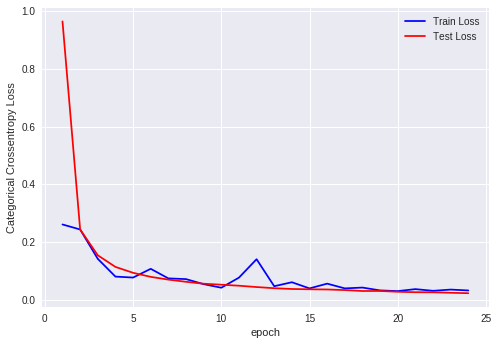

In [32]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
import numpy as np
import time
plt.plot(list(range(1,epochs+1)), history.history['val_loss'], 'b', label="Train Loss")
plt.plot(list(range(1,epochs+1)), history.history['loss'], 'r', label="Test Loss")
plt.legend()
plt.xlabel('epoch') ; plt.ylabel('Categorical Crossentropy Loss')

## [3] Convolutional Neural Network with 3x3 kernel and 5 covolutional layers followed by maxpooling after last layer and at last dense layers.

In [0]:
batch_size = 364
epochs = 36

#### With dropout rate = 0.5

In [0]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(36, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(72, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(628, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [39]:
model.summary()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 20, 20, 36)        10404     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 18, 18, 64)        20800     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 72)        41544     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 72)          0         
__________

Test score: 0.01765020714525308
Test accuracy: 0.995


Text(0, 0.5, 'Categorical Crossentropy Loss')

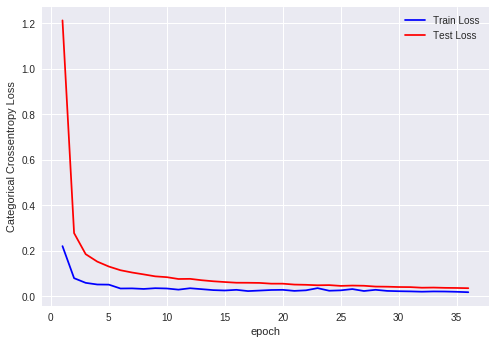

In [40]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
import numpy as np
import time
plt.plot(list(range(1,epochs+1)), history.history['val_loss'], 'b', label="Train Loss")
plt.plot(list(range(1,epochs+1)), history.history['loss'], 'r', label="Test Loss")
plt.legend()
plt.xlabel('epoch') ; plt.ylabel('Categorical Crossentropy Loss')

#### With dropout rate = 0.3

In [0]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(36, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(72, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(628, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [43]:
model.summary()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 20, 20, 36)        10404     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 18, 18, 64)        20800     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 72)        41544     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 72)          0         
__________

Test score: 0.02018869715525416
Test accuracy: 0.9949


Text(0, 0.5, 'Categorical Crossentropy Loss')

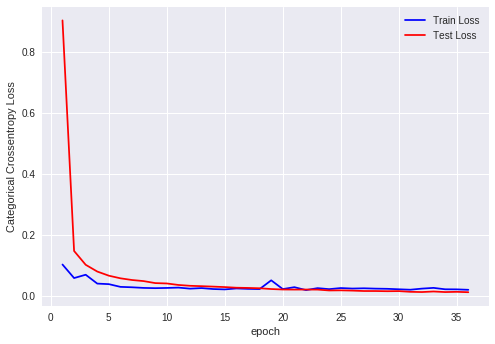

In [44]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
import numpy as np
import time
plt.plot(list(range(1,epochs+1)), history.history['val_loss'], 'b', label="Train Loss")
plt.plot(list(range(1,epochs+1)), history.history['loss'], 'r', label="Test Loss")
plt.legend()
plt.xlabel('epoch') ; plt.ylabel('Categorical Crossentropy Loss')

#### With Dropout rate = 0.1

In [0]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(36, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(72, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dense(628, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [47]:
model.summary()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 20, 20, 36)        10404     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 18, 18, 64)        20800     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 72)        41544     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 72)          0         
__________

Test score: 0.04020679708972575
Test accuracy: 0.9923


Text(0, 0.5, 'Categorical Crossentropy Loss')

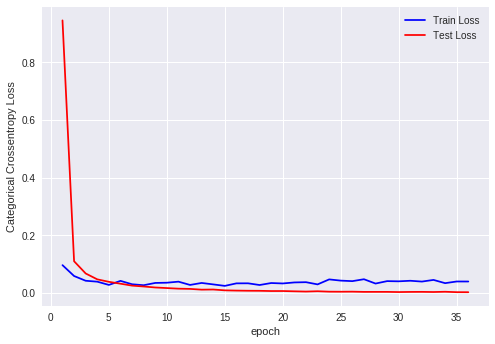

In [48]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
import numpy as np
import time
plt.plot(list(range(1,epochs+1)), history.history['val_loss'], 'b', label="Train Loss")
plt.plot(list(range(1,epochs+1)), history.history['loss'], 'r', label="Test Loss")
plt.legend()
plt.xlabel('epoch') ; plt.ylabel('Categorical Crossentropy Loss')

## Comparison of all the models.

In [50]:
x = PrettyTable()
x.field_names = ["Model Number", "No of convolutions", "Kernel Size", "Best dropout rate", "Test data score", "Accuracy"]
x.add_row([1, 2, '2x2',0.5,0.0309, 0.9906 ])
x.add_row([2, 3, '5x5', 0.1, 0.0318, 0.9919])
x.add_row([3, 5, '3x3',0.5, 0.0176, 0.995])
print(x)

+--------------+--------------------+-------------+-------------------+-----------------+----------+
| Model Number | No of convolutions | Kernel Size | Best dropout rate | Test data score | Accuracy |
+--------------+--------------------+-------------+-------------------+-----------------+----------+
|      1       |         2          |     2x2     |        0.5        |      0.0309     |  0.9906  |
|      2       |         3          |     5x5     |        0.1        |      0.0318     |  0.9919  |
|      3       |         5          |     3x3     |        0.5        |      0.0176     |  0.995   |
+--------------+--------------------+-------------+-------------------+-----------------+----------+


#### Here I implemented 3 CNN models on the MNIST dataset with different dropout rates.


[1] The first model consisted of only 2 convolutions with the kernel size of 2x2 followed by a max pooling layer and 1 dense layer with ReLU activation unit and the output layer which had the sigmoid activation unit it gave accuracy of 99.06%.


[2] The second model consisted of 3 convolutions with the kernel size of 5x5 with the max pooling layer after the 1st layer and the 3rd layer followed by 3 dense layer with ReLU activation units and the output layer which had the sigmoid activation unit. This model gave accuracy of 99.19%.


[3] The third model consisted of 5 convolutions with the kernel size of 3x3 with the maxpooling at the very end of the convolutions, it was followed by 4 dense layers with ReLU activation units and the output layer which had the sigmoid activation unit. This model gave accuracy of 99.50%.


#### From the above comparison of the models in terms of accuracy it can be seen that the 3rd model performed better although the difference in the metric as compared to the other two models is very minute.